In [94]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [95]:
bank=pd.read_csv('bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [96]:
bank.shape

(45211, 17)

In [97]:
pd.get_dummies(bank)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [98]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [99]:
bank1=pd.get_dummies(bank.iloc[:,0:16])

In [100]:
bank1['y']=np.where(bank['y']=='yes',1,0)
bank1

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [101]:
X=bank1.iloc[:,0:16]
Y=bank1.iloc[:,16]

In [102]:
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [103]:
y_pred = classifier.predict(X)

In [104]:
y_pred_df=pd.DataFrame({'actual':Y,
                       'precdited_prob':classifier.predict(X)})

In [105]:
y_pred_df

,actual,precdited_prob
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,0,0
45208,0,1
45209,0,0


In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[35911  1703]
 [ 3839  3758]]


In [107]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     37614
           1       0.69      0.49      0.58      7597

    accuracy                           0.88     45211
   macro avg       0.80      0.72      0.75     45211
weighted avg       0.87      0.88      0.87     45211



In [108]:
classifier.predict_proba(X)[:,1]

array([0.0015459 , 0.41187476, 0.20466901, ..., 0.50227876, 0.00266238,
       0.97806168])

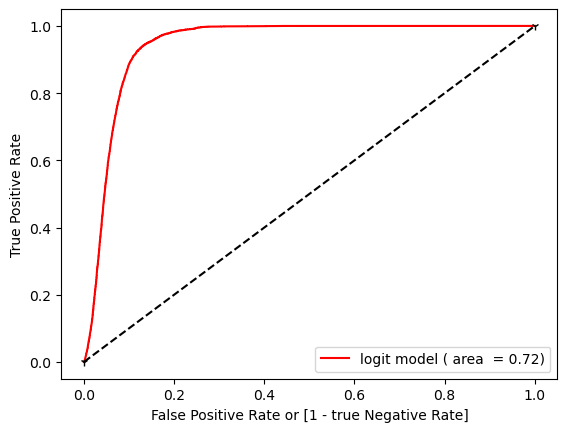

In [109]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr, thresholds =roc_curve(Y, classifier.predict_proba(X)[:,1])
auc =roc_auc_score(Y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--1')
plt.xlabel('False Positive Rate or [1 - true Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [110]:
auc

0.7246966265245943

In [111]:
import statsmodels.api as sm

In [112]:
sm.Logit(Y,X).fit().summary()

         Current function value: inf
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         job_technician   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:                     inf
Time:                        12:00:43   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0175      0.002     11.598      0.000       0.015       0.020
balance           -2.351e-05   9.35e-06     -2.514      0.012   -4.18e-05   -5.18e-06
day                   0.0343      0.003     11.400      0.000       0.028       0.040
duration              0.0001      0.000      1.262      0.207   -7.27e-05       0.000
campaign              0.0690      0.012      5.802      0.000       0.046       0.092
pdays                 0.0011      0.000      2.724      0.006       0.000       0.002
previous              0.0507      0.023      2.205      0.027       0.006       0.096
job_admin.          -25.4478   2098.569     -0.012      0.990   -4138.568    4087.673
job_blue-collar     -38.4588   1.01e+06   -3.8e-05      1.000   -1.98e+06    1.98e+06
job_entrepreneur    -23.9814   1853.006     -0.013      0.990   -3655.806    3607.843
job_housemaid       -26.9847   8773.690     -0.003      0.998   -1.72e+04    1.72e+04
job_management      -30.3356   1978.530     -0.015      0.988   -3908.183    3847.512
job_retired         -22.4149    591.363     -0.038      0.970   -1181.465    1136.635
job_self-employed  -246.4651   3.68e+51   -6.7e-50      1.000   -7.21e+51    7.21e+51
job_services        -19.6966    132.464     -0.149      0.882    -279.322     239.929
job_student         -31.5519   1.19e+05     -0.000      1.000   -2.34e+05    2.34e+05
=====================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""